### NLP (Natural Language Processing) with Python

In this lecture we will discuss a higher level overview of the basics of Natural Language Processing, which basically consists of combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understand!

Once you've completed this lecture you'll have a project using some Yelp Text Data!
Requirements: You will need to have NLTK installed, along with downloading the corpus for stopwords. To download everything with a conda installation, run the cell below. Or reference the full video lecture

## Basic Understanding 

In [1]:
import nltk

In [2]:
messages = [line.rstrip()for line in open('smsspamcollection/SMSSpamCollection')]

In [3]:
print(len(messages))

5574


In [4]:
messages[3]

'ham\tU dun say so early hor... U c already then say...'

In [5]:
for mess_no, messages in enumerate(messages[:10]):
    print(mess_no,messages)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 

In [7]:
messages[0]

s


In [8]:
import pandas as pd 

In [9]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                      names=['labels','message'])

In [10]:
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [15]:
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [19]:
%matplotlib inline

In [23]:
messages['length'] = messages['message'].apply(len)

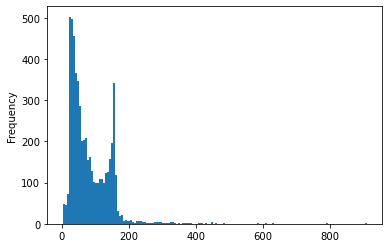

In [25]:
messages['length'].plot.hist(bins=150);

In [26]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [28]:
# Explore outlier 
messages[messages['length']== 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

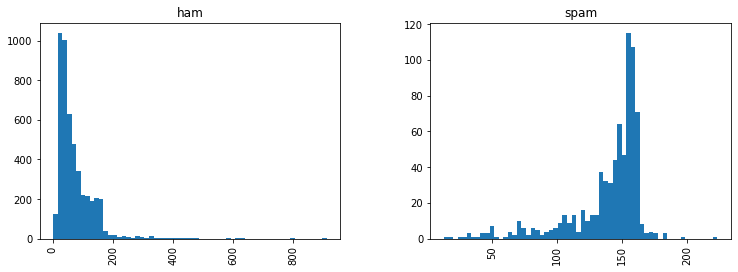

In [31]:
messages.hist(column='length', by='labels', bins=60, figsize=(12,4))

- Spam messages tend to have more characters. Length is a good feature to distinguish the data.

In [32]:
import string

In [33]:
mess = ' Sample message! Notice: it has punctuation.'

In [35]:
nopunc = [c for c in mess if c not in string.punctuation]

In [36]:
from nltk.corpus import stopwords

In [37]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
nopunc

[' ',
 'S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [39]:
nopunc = ''.join(nopunc)

In [41]:
nopunc

' Sample message Notice it has punctuation'

In [42]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [43]:
# Remove stopwords 
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [44]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [45]:
# Create a function to apply to the data frame 

def txt_process(mess):
    """
    1. remove punc
    2. remove stop words
    3.return list of clean text words
    """
    
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [47]:
messages['message'].head(5).apply(txt_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

 - Removed stop words and tokenized words

----

In [50]:
# Create word into victorization
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
bow_transformer = CountVectorizer(analyzer=txt_process).fit(messages['message'])

In [54]:
print(len(bow_transformer.vocabulary_))

11425


In [55]:
mess4 = messages['message'][3]

In [56]:
print(mess4)

U dun say so early hor... U c already then say...


In [57]:
bow4 = bow_transformer.transform([mess4])

In [58]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [60]:
print(bow4.shape)

(1, 11425)


In [62]:
bow_transformer.get_feature_names()[9554]

'say'

In [63]:
messages_bow = bow_transformer.transform(messages['message'])

In [64]:
print('Shape of Sparse Matrix:', messages_bow.shape)

Shape of Sparse Matrix: (5572, 11425)


In [65]:
# none zero accurances 
messages_bow.nnz

50548

In [68]:
# none zeros compared to the total matrix
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.07940295412668218


In [70]:
from sklearn.feature_extraction.text import TfidfTransformer

In [73]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [74]:
tfidf4 = tfidf_transformer.transform(bow4)

In [75]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [77]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [78]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [79]:
from sklearn.naive_bayes import MultinomialNB

In [82]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['labels'])

In [83]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [84]:
messages['labels'][3]

'ham'

In [85]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [86]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['labels'],test_size=0.3)

In [89]:
from sklearn.pipeline import Pipeline

In [91]:
# Create a function 
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=txt_process)),
    ('tdidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [92]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function txt_process at 0x7f82452e11f0>)),
                ('tdidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [93]:
predictions = pipeline.predict(msg_test)

In [94]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1450
        spam       1.00      0.67      0.80       222

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.89      1672
weighted avg       0.96      0.96      0.95      1672



----

## Natural Language Processing Project 



Welcome to the NLP Project for this section of the course. In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.
We will use the Yelp Review https://www.kaggle.com/c/yelp-recsys-2013 

Each observation in this dataset is a review of a particular business by a particular user.
The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users.
All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.
Let's get started! Just follow the directions below!

In [98]:
# Import Libaries 
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [99]:
#Import Data
df = pd.read_csv('yelp.csv')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [101]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [102]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [106]:
df['text_length'] = df['text'].apply(len)

In [107]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


----

## EDA Process 

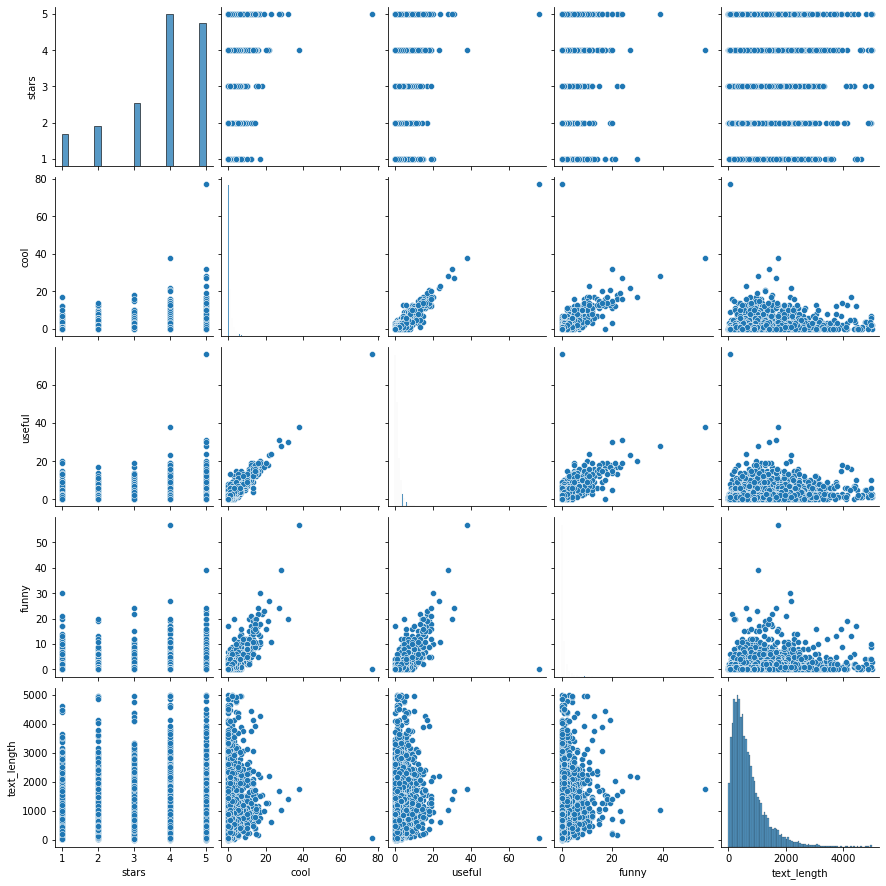

In [110]:
sns.pairplot(df)

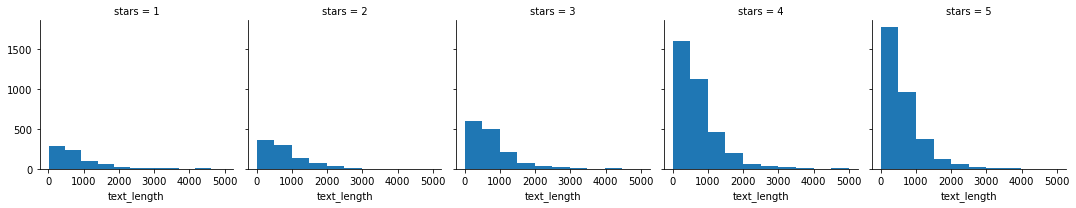

In [112]:
# Create FacetGrid
g = sns.FacetGrid(df,col='stars')
g.map(plt.hist,'text_length')

<AxesSubplot:xlabel='stars', ylabel='text_length'>

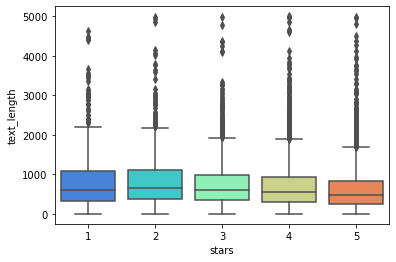

In [115]:
# Create boxplot
sns.boxplot(x='stars',y='text_length',data=df,palette='rainbow')

<AxesSubplot:xlabel='stars', ylabel='count'>

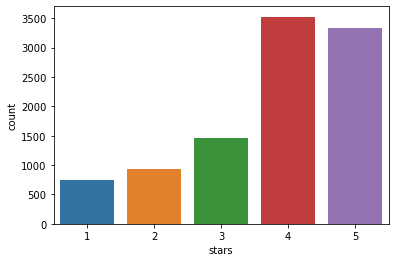

In [117]:
#Create a countplot
sns.countplot(x='stars',data=df)

In [118]:
stars = df.groupby('stars').mean()

In [119]:
stars

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [120]:
stars.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

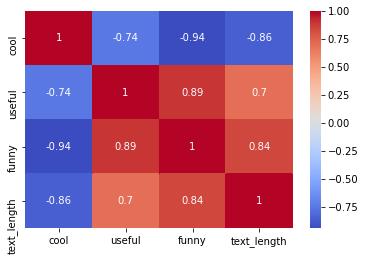

In [121]:
# Create heatmap
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

----

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.

In [124]:
yelp_class = df[(df.stars==1) | (df.stars ==5)]

In [125]:
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [126]:
#Split Data

X = yelp_class['text']
y= yelp_class['stars']

### Import CountVectorizer and create a CountVectorizer object.

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [128]:
X = cv.fit_transform(X)

# Train Test Split

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

----

## Training a model

In [131]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [132]:
nb.fit(X_train,y_train)

MultinomialNB()

## Predictions and Evaluation 

In [133]:
predictions = nb.predict(X_test)

In [134]:
from sklearn.metrics import confusion_matrix,classification_report

In [135]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



----

## Using Text Processing

In [137]:
from sklearn.feature_extraction.text import TfidfTransformer

In [138]:
from sklearn.pipeline import Pipeline

In [139]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Using the Pipeline

#### Train Test Split

In [140]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Fit the pipeline 

In [141]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

## Predictions and Evaluations

In [142]:
predict = pipeline.predict(X_test)

In [144]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


__Conclusion From Data__

- Looks like Tf-Idf actually made things worse

- Some other things to try.... Try going back and playing around with the pipeline steps and seeing if creating a custom analyzer like we did in the lecture helps (note: it probably won't). Or recreate the pipeline with just the CountVectorizer() and NaiveBayes. Does changing the ML model at the end to another classifier help at all?